In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | mortka
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | hirna
Processing Record 10 of Set 1 | goba
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | roald
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | port hawkesbury
Processing Record 18 of Set 1 | prince rupert
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | lorengau
Processing Record 23 of Set 1 | yellowknife
Processing Record 24 of Set 1 | butaritari
Processing Record

Processing Record 36 of Set 4 | monte alegre
Processing Record 37 of Set 4 | prien
Processing Record 38 of Set 4 | coquimbo
Processing Record 39 of Set 4 | north bend
Processing Record 40 of Set 4 | rock springs
Processing Record 41 of Set 4 | viligili
City not found. Skipping...
Processing Record 42 of Set 4 | havoysund
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | esqueda
Processing Record 45 of Set 4 | romanovo
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | berlevag
Processing Record 48 of Set 4 | danshui
Processing Record 49 of Set 4 | malindi
Processing Record 50 of Set 4 | nuoro
Processing Record 1 of Set 5 | cessnock
Processing Record 2 of Set 5 | soars
Processing Record 3 of Set 5 | tanggu
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | coolum beach
Processing Record 6 of Set 5 | spearfish
Processing Record 7 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 8 of Set 5 | shubarshi
Proc

Processing Record 27 of Set 8 | eldoret
Processing Record 28 of Set 8 | sirsa
Processing Record 29 of Set 8 | san rafael
Processing Record 30 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 31 of Set 8 | tilichiki
Processing Record 32 of Set 8 | khanpur
Processing Record 33 of Set 8 | payyannur
Processing Record 34 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 8 | hofn
Processing Record 36 of Set 8 | erenhot
Processing Record 37 of Set 8 | winnemucca
Processing Record 38 of Set 8 | kuche
City not found. Skipping...
Processing Record 39 of Set 8 | quesnel
Processing Record 40 of Set 8 | la rioja
Processing Record 41 of Set 8 | lima
Processing Record 42 of Set 8 | rock sound
Processing Record 43 of Set 8 | guerrero negro
Processing Record 44 of Set 8 | camacha
Processing Record 45 of Set 8 | morehead
Processing Record 46 of Set 8 | kendari
Processing Record 47 of Set 8 | shimoda
Processing Record 48 of Set 8 | hueyapan
Processing Record 

Processing Record 12 of Set 12 | mangan
Processing Record 13 of Set 12 | abha
Processing Record 14 of Set 12 | peringat
Processing Record 15 of Set 12 | yumen
Processing Record 16 of Set 12 | langxiang
Processing Record 17 of Set 12 | bamiantong
Processing Record 18 of Set 12 | moose factory
Processing Record 19 of Set 12 | maragogi
Processing Record 20 of Set 12 | korablino
Processing Record 21 of Set 12 | rocha
Processing Record 22 of Set 12 | brzeg dolny
Processing Record 23 of Set 12 | buluang
Processing Record 24 of Set 12 | san jose
Processing Record 25 of Set 12 | krasnoselkup
Processing Record 26 of Set 12 | mariinsk
Processing Record 27 of Set 12 | savonlinna
Processing Record 28 of Set 12 | chunskiy
Processing Record 29 of Set 12 | algeciras
Processing Record 30 of Set 12 | sistranda
Processing Record 31 of Set 12 | suba
Processing Record 32 of Set 12 | kipini
Processing Record 33 of Set 12 | hokitika
Processing Record 34 of Set 12 | abonnema
Processing Record 35 of Set 12 | 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,66.49,94,40,6.91,MU,2022-08-01 22:39:51
1,Kavieng,-2.5744,150.7967,81.23,81,100,15.37,PG,2022-08-01 22:39:52
2,Bethel,41.3712,-73.4140,77.90,80,100,6.91,US,2022-08-01 22:39:23
3,Mortka,59.3322,66.0214,50.81,79,11,4.70,RU,2022-08-01 22:39:52
4,Hilo,19.7297,-155.0900,80.26,84,100,5.75,US,2022-08-01 22:38:05
5,Mar Del Plata,-38.0023,-57.5575,53.10,93,0,3.44,AR,2022-08-01 22:38:27
6,Saint-Philippe,-21.3585,55.7679,67.59,75,2,2.59,RE,2022-08-01 22:38:04
7,Mataura,-46.1927,168.8643,49.82,90,99,6.46,NZ,2022-08-01 22:38:22
8,Hirna,9.2167,41.1000,60.48,89,93,8.50,ET,2022-08-01 22:39:53
9,Goba,7.0167,39.9833,50.72,95,98,2.53,ET,2022-08-01 22:39:54


In [10]:
# Fix the column header order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2022-08-01 22:39:51,-20.4081,57.7000,66.49,94,40,6.91
1,Kavieng,PG,2022-08-01 22:39:52,-2.5744,150.7967,81.23,81,100,15.37
2,Bethel,US,2022-08-01 22:39:23,41.3712,-73.4140,77.90,80,100,6.91
3,Mortka,RU,2022-08-01 22:39:52,59.3322,66.0214,50.81,79,11,4.70
4,Hilo,US,2022-08-01 22:38:05,19.7297,-155.0900,80.26,84,100,5.75
5,Mar Del Plata,AR,2022-08-01 22:38:27,-38.0023,-57.5575,53.10,93,0,3.44
6,Saint-Philippe,RE,2022-08-01 22:38:04,-21.3585,55.7679,67.59,75,2,2.59
7,Mataura,NZ,2022-08-01 22:38:22,-46.1927,168.8643,49.82,90,99,6.46
8,Hirna,ET,2022-08-01 22:39:53,9.2167,41.1000,60.48,89,93,8.50
9,Goba,ET,2022-08-01 22:39:54,7.0167,39.9833,50.72,95,98,2.53


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

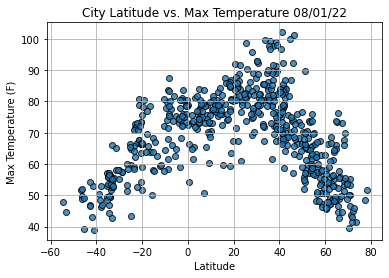

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

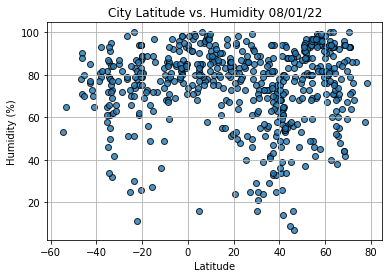

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

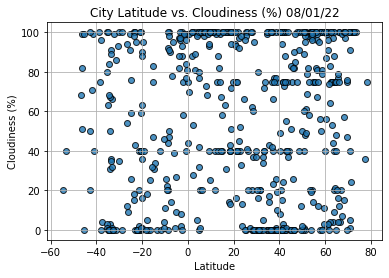

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

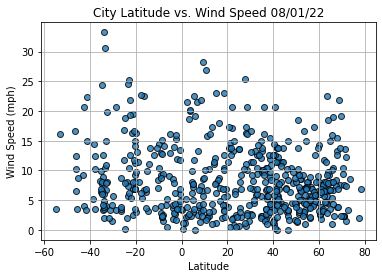

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()